# **Inport** **Libraries**

In [ ]:
!pip install opendatasets

import numpy as np
import opendatasets as od

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# **Downloading dataset**

In [ ]:
dts_url = 'https://www.kaggle.com/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda'
od.download(dts_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mmrassel
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda


100%|██████████| 376M/376M [00:03<00:00, 104MB/s]


In [ ]:
import os

#Count the number of images in each subdirectory of the given root path.
#Parameters: root_path (str): The path to the root directory containing subdirectories of images.
#Returns: dict: A dictionary with subdirectory names as keys and the number of images as values.

def image_count(root_path):
    image_counts = {}  # Dictionary to store the count of images for each subdirectory

    # Loop through each subdirectory in the root directory
    for sub_dir in os.listdir(root_path):
        sub_dir_path = os.path.join(root_path, sub_dir)  # Full path to the subdirectory

        # Check if the path is a directory
        if os.path.isdir(sub_dir_path):
            im_count = 0  # Initialize the count of images for this subdirectory

            # Loop through each file in the subdirectory
            for file_name in os.listdir(sub_dir_path):
                # Check if the file is an image based on its extension
                if file_name.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
                    im_count += 1  # Increment the image count

            # Add the subdirectory and its image count to the dictionary
            image_counts[sub_dir] = im_count

    return image_counts  # Return the dictionary with image counts for each subdirectory

# Define the path to the root directory containing image subdirectories
root_path = '/content/animal-image-datasetdog-cat-and-panda/animals/animals'

# Get the image counts for each subdirectory
image_counts = image_count(root_path)

# Print the image counts for each subdirectory
for sub_dir, im_count in image_counts.items():
    print(f'{sub_dir}: {im_count} images')

cats: 1000 images
dogs: 1000 images
panda: 1000 images


In [ ]:
from PIL import Image

In [ ]:
from PIL import Image

#Returns the dimensions (width and height) of an image given its file path.
#Args:image_path (str): The file path to the image.
#Returns:tuple: A tuple containing the width and height of the image.

def image_dimension(image_path):

    # Open the image file
    with Image.open(image_path) as img:
        # Return the dimensions of the image (width, height)
        return img.size

# Define the path to the image file
image_path = '/content/animal-image-datasetdog-cat-and-panda/animals/animals/cats/cats_00001.jpg'

# Print the dimensions of the image
print(image_dimension(image_path))


(500, 374)


In [ ]:
import os
from PIL import Image
import numpy as np

# Define the directory containing the dataset
dataDir = '/content/animal-image-datasetdog-cat-and-panda/animals/animals'

# Define the target image size for resizing
image_size = (32, 32)

# Initialize lists to hold image data and labels
images = []
labels = []

# Mapping of class labels to integer values
class_labels = {'cats': 0, 'dogs': 1, 'panda': 2}

# Define valid image file extensions
img_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Iterate over each class in the dataset
for class_label, class_name in class_labels.items():
    # Build the path to the directory containing images of the current class
    class_dir = os.path.join(dataDir, class_label)

    # Iterate over each file in the class directory
    for filename in os.listdir(class_dir):
        # Check if the file is an image based on its extension
        if filename.endswith(img_extensions):
            # Build the full path to the image file
            img_path = os.path.join(class_dir, filename)

            # Open and resize the image
            img = Image.open(img_path)
            img = img.resize(image_size)

            # Convert the image to a numpy array
            img_array = np.array(img)

            # Ensure the image has the correct shape and append to the lists
            if img_array.shape == (32, 32, 3):
                images.append(img_array)
                labels.append(class_name)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize image data to the range [0, 1]
images = images.astype('float32') / 255.0

# Print the shape of the image and label arrays
print(images.shape, labels.shape)

(2993, 32, 32, 3) (2993,)


In [ ]:
# Reshape the labels array to be a 1-dimensional array
labels = labels.reshape(-1)

# Display the first 12 elements of the reshaped labels array
labels[:12]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# List of class names for the confusion matrix
class_names = ['cats', 'dogs', 'panda']

In [ ]:
import tensorflow as tf
import numpy as np

# Convert RGB images to grayscale
images = tf.image.rgb_to_grayscale(images)

# Normalize the pixel values to be between 0 and 1
images = images / 255

# Compute the mean along the color channels (axis 3) to reduce the image to a 2D array
# Note: This line is optional because grayscale images are already in 2D, so it might be redundant.
images = np.mean(images, axis=3)

# Flatten the images from 2D to 1D for each image
# Reshape each image to a vector, with the shape (number of images, number of pixels per image)
images = images.reshape(images.shape[0], -1)

# Output the shape of the processed images
images.shape

(2993, 1024)

In [ ]:
train_img_flat = images

# Flatten the labels array to ensure it is a 1D array for processing
train_labels_flat = labels.flatten()

In [ ]:
import matplotlib.pyplot as plt

def plot_grey_img(X, y, index):

    #Plots a grayscale image from the dataset with a title and label.

    #Parameters:
    #X (numpy array): The dataset containing images. Assumes images are flattened and need reshaping.
    #y (numpy array): The array containing class labels for each image.
    #index (int): The index of the image to be plotted.

    # Reshape the image from a flattened array to a 32x32 grayscale image
    image = X[index].reshape(32, 32)

    # Create a new figure with size 2x2 inches
    plt.figure(figsize=(2,2))

    # Display the image in grayscale
    plt.imshow(image, cmap='gray')

    # Set the title of the plot to include the index of the image
    plt.title(f"CIFAR-10 Image: {index}")

    # Set the x-label to the class name corresponding to the label of the image
    plt.xlabel(class_names[y[index]])

    # Show the plot
    plt.show()

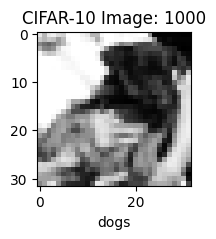

In [ ]:
plot_grey_img(train_img_flat, train_labels_flat, 1000)

# **Manhatten**

In [ ]:
# Initialize KFold cross-validator with 5 splits
# shuffle=True will shuffle the data before splitting into batches
# random_state=4 ensures reproducibility of the splits
kf = KFold(n_splits=5, shuffle=True, random_state=4)

In [ ]:
# Initialize an empty list to store accuracy scores
accuracy_scores = []

# Initialize an empty list to store confusion matrices
confusion_matrices = []

In [ ]:
# Dictionary to store accuracy for each fold
m_accuracy_dict = {}

# Perform K-Fold cross-validation
for fold, (train_index, valid_index) in enumerate(kf.split(train_img_flat)):
    # Split the data into training and validation sets for the current fold
    train_images_fold, valid_images_fold = train_img_flat[train_index], train_img_flat[valid_index]
    train_labels_fold, valid_labels_fold = train_labels_flat[train_index], train_labels_flat[valid_index]

    # Initialize the K-Nearest Neighbors classifier with Manhattan distance metric
    knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

    # Train the model on the training fold
    knn.fit(train_images_fold, train_labels_fold)

    # Predict the labels on the validation fold
    valid_pred = knn.predict(valid_images_fold)

    # Calculate the accuracy for the current fold
    fold_accuracy = accuracy_score(valid_labels_fold, valid_pred)
    accuracy_scores.append(fold_accuracy)  # Append accuracy to the list

    # Compute the confusion matrix for the current fold
    fold_cm = confusion_matrix(valid_labels_fold, valid_pred)
    confusion_matrices.append(fold_cm)  # Append confusion matrix to the list

    # Print the accuracy for the current fold
    print(f"Fold {fold + 1} accuracy:", fold_accuracy)

    # Store the accuracy of the current fold in the dictionary
    m_accuracy_dict[fold + 1] = fold_accuracy

# Calculate and print the average accuracy across all folds
print("Average accuracy:", np.mean(accuracy_scores))

# Print the dictionary containing accuracies for all folds
print(m_accuracy_dict)

Fold 1 accuracy: 0.4707846410684474
Fold 2 accuracy: 0.5108514190317195
Fold 3 accuracy: 0.4590984974958264
Fold 4 accuracy: 0.45484949832775917
Fold 5 accuracy: 0.5117056856187291
Average accuracy: 0.4814579483084963
{1: 0.4707846410684474, 2: 0.5108514190317195, 3: 0.4590984974958264, 4: 0.45484949832775917, 5: 0.5117056856187291}


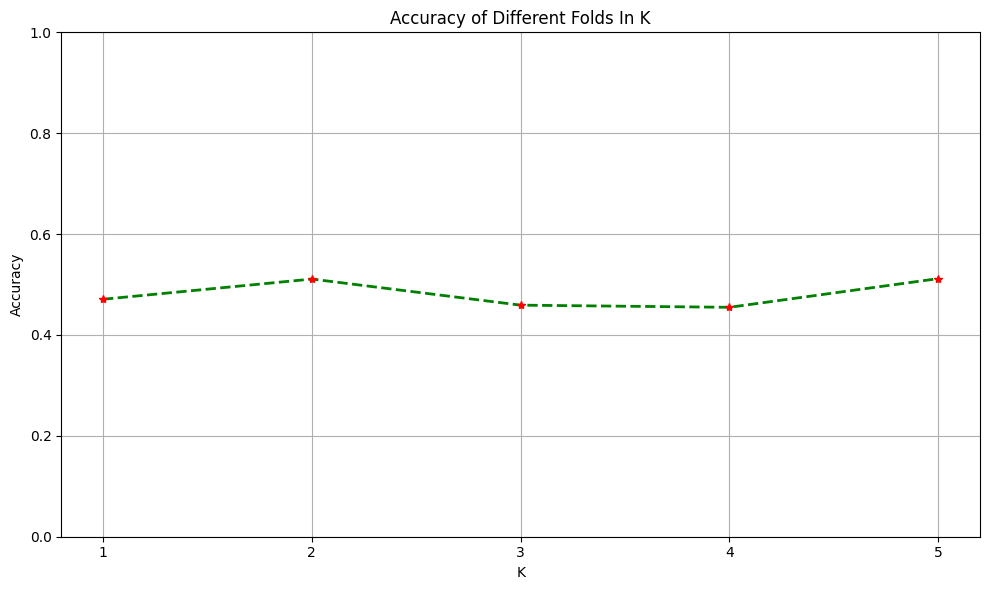

In [ ]:
# Extracting fold numbers and corresponding accuracies from the dictionary
folds = list(m_accuracy_dict.keys())
accuracies = list(m_accuracy_dict.values())

# Setting up the figure size for the plot
plt.figure(figsize=(10, 6))

# Plotting the accuracy for each fold (K value), with markers and specific line style
plt.plot(folds, accuracies, marker='*',markerfacecolor='red',markeredgecolor='red', color='green', linestyle='--', linewidth=2)

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Folds In K')
plt.ylim(0, 1.0)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.grid(True)
plt.show()

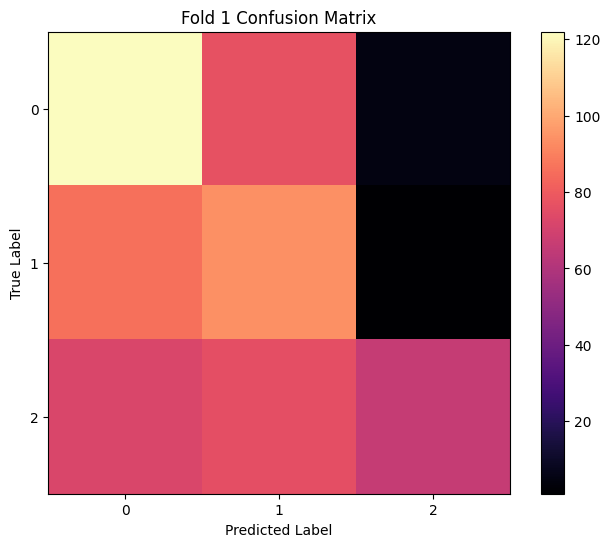

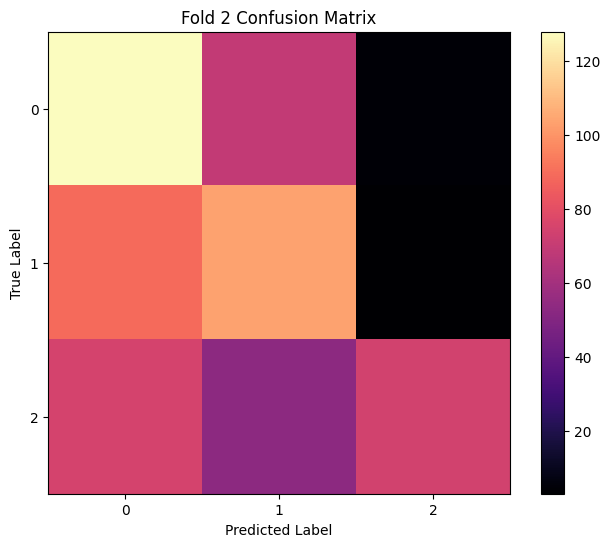

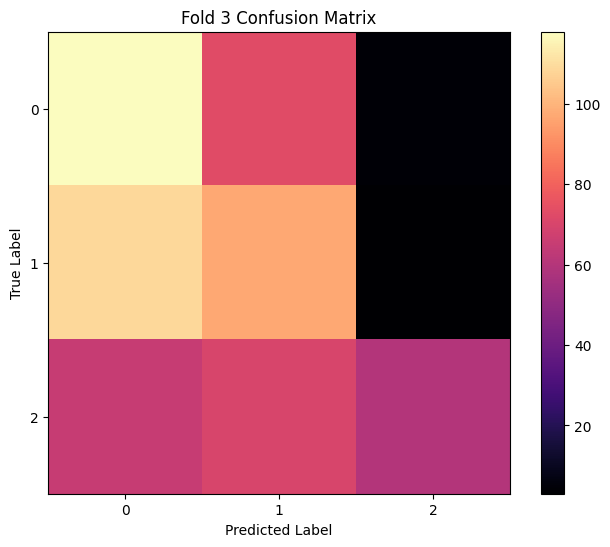

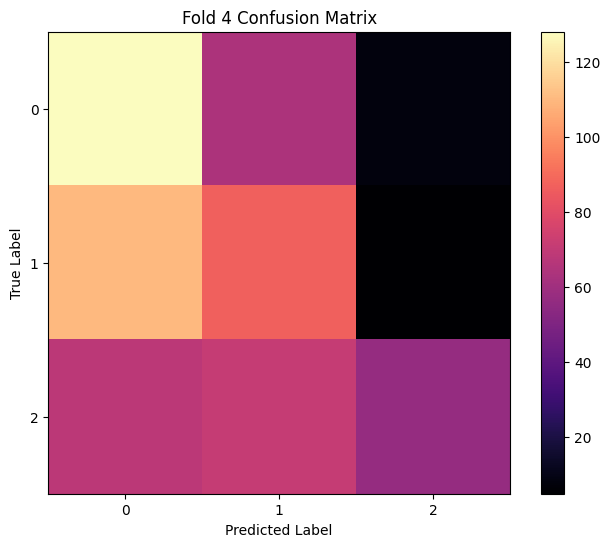

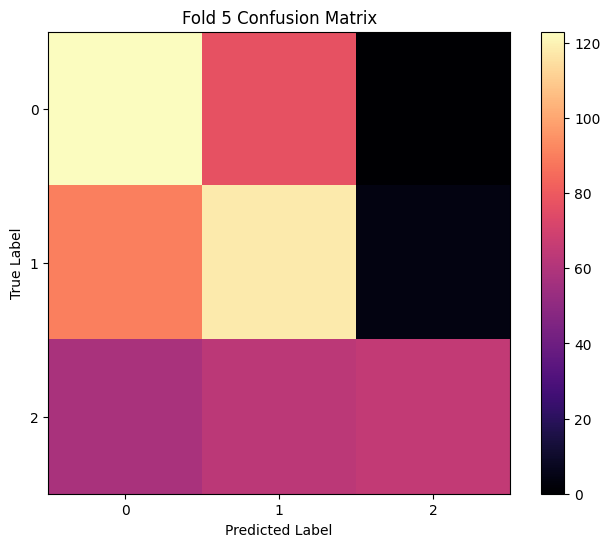

In [ ]:
# Loop through each confusion matrix
for i, cm in enumerate(confusion_matrices):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='magma')
    plt.title(f"Fold {i + 1} Confusion Matrix")
    plt.colorbar()
    plt.xticks(np.arange(3), range(3))
    plt.yticks(np.arange(3), range(3))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

confusion_matrices.clear()

# **Euclidean**

In [ ]:
# Initialize an empty list to store accuracy scores
e_accuracies = []

# Initialize an empty list to store confusion matrices
e_confusion_matrices = []

In [ ]:
# Dictionary to store accuracy for each fold
e_accuracy_dict = {}

# Loop through each fold of K-fold cross-validation
for fold, (train_index, valid_index) in enumerate(kf.split(train_img_flat)):
    # Split the data into training and validation sets for the current fold
    train_images_fold, valid_images_fold = train_img_flat[train_index], train_img_flat[valid_index]
    train_labels_fold, valid_labels_fold = train_labels_flat[train_index], train_labels_flat[valid_index]

    # Initialize K-Nearest Neighbors classifier with 5 neighbors and Euclidean distance
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

    # Train the classifier on the training fold
    knn.fit(train_images_fold, train_labels_fold)

    # Make predictions on the validation fold
    valid_pred = knn.predict(valid_images_fold)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(valid_labels_fold, valid_pred)
    e_accuracies.append(fold_accuracy)  # Append accuracy to the list of accuracies

    # Compute the confusion matrix for the current fold
    fold_cm = confusion_matrix(valid_labels_fold, valid_pred)
    e_confusion_matrices.append(fold_cm)  # Append confusion matrix to the list

    # Print accuracy for the current fold
    print(f"Fold {fold + 1} accuracy:", fold_accuracy)

    # Store the fold accuracy in the dictionary
    e_accuracy_dict[fold + 1] = fold_accuracy

# Print the average accuracy over all folds
print("Average accuracy:", np.mean(e_accuracies))

# Print the accuracy dictionary for each fold
print(e_accuracy_dict)

Fold 1 accuracy: 0.4290484140233723
Fold 2 accuracy: 0.44240400667779634
Fold 3 accuracy: 0.4240400667779633
Fold 4 accuracy: 0.4230769230769231
Fold 5 accuracy: 0.45652173913043476
Average accuracy: 0.435018229937298
{1: 0.4290484140233723, 2: 0.44240400667779634, 3: 0.4240400667779633, 4: 0.4230769230769231, 5: 0.45652173913043476}


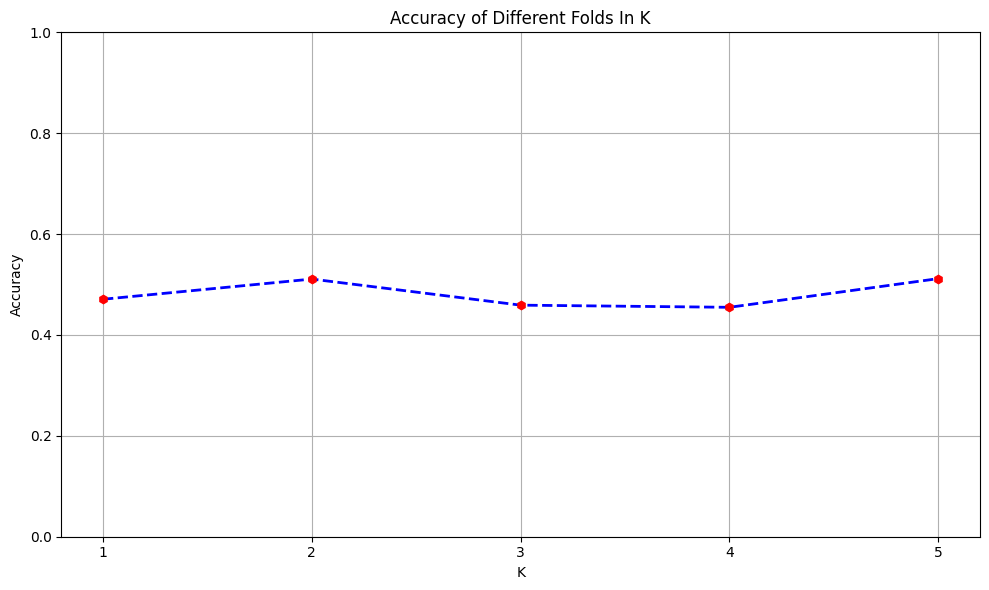

In [ ]:
# Extracting fold numbers and corresponding accuracies from the dictionary
folds = list(m_accuracy_dict.keys())
accuracies = list(m_accuracy_dict.values())

# Setting up the figure size for the plot
plt.figure(figsize=(10, 6))

# Plotting the accuracy for each fold (K value), with markers and specific line style
plt.plot(folds, accuracies, marker='h',markerfacecolor='red',markeredgecolor='red', color='blue', linestyle='--', linewidth=2)

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Folds In K')
plt.ylim(0, 1.0)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
e_confusion_matrices

[array([[108,  91,   5],
        [ 78, 101,   2],
        [ 71,  95,  48]]),
 array([[126,  71,   4],
        [ 96,  98,   2],
        [ 88,  73,  41]]),
 array([[116,  75,   4],
        [109,  97,   3],
        [ 71,  83,  41]]),
 array([[121,  73,   6],
        [108,  91,   3],
        [ 76,  79,  41]]),
 array([[106,  93,   1],
        [ 87, 122,   3],
        [ 63,  78,  45]])]

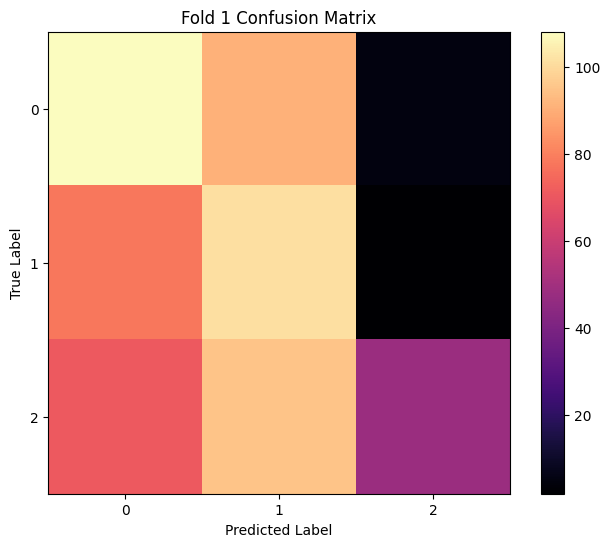

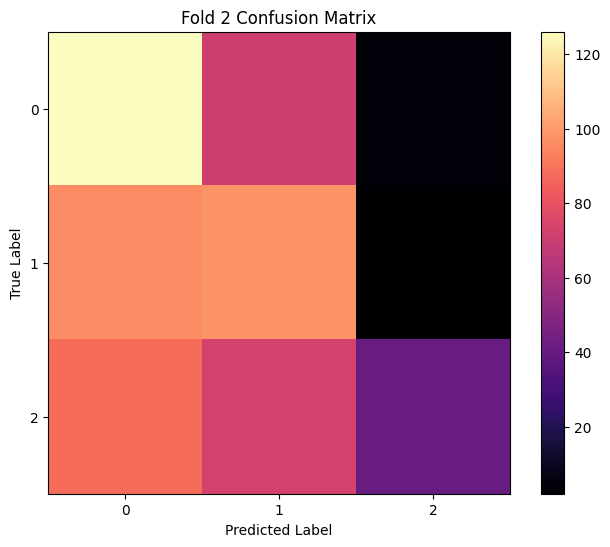

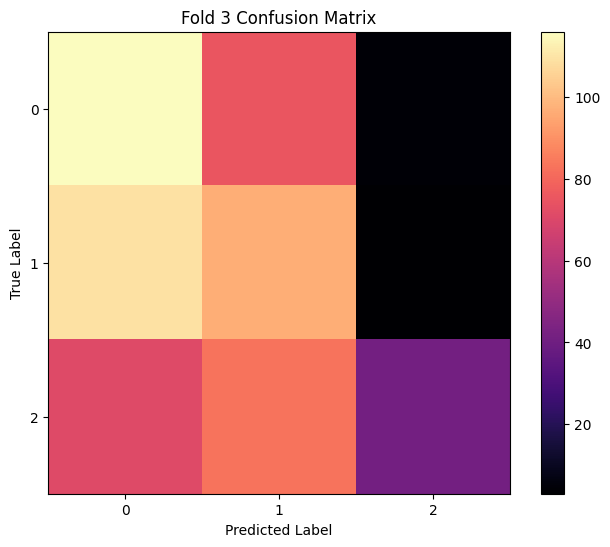

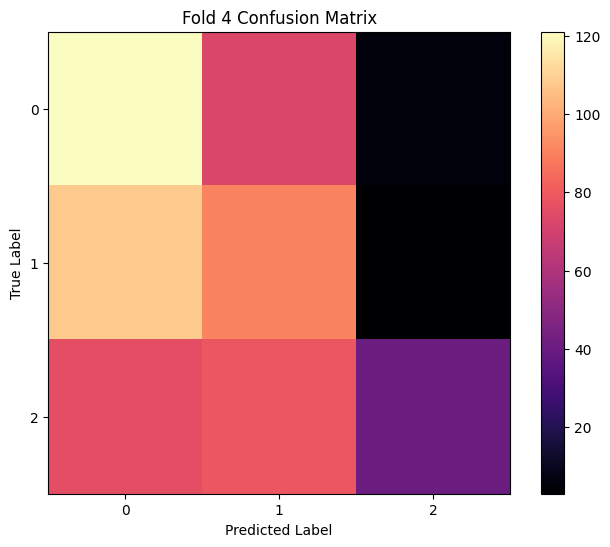

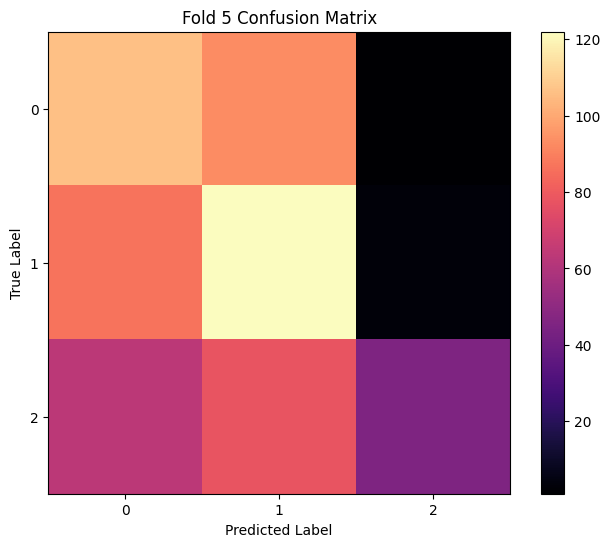

In [ ]:
# Loop through each confusion matrix
for i, cm in enumerate(e_confusion_matrices):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='magma')
    plt.title(f"Fold {i + 1} Confusion Matrix")
    plt.colorbar()
    plt.xticks(np.arange(3), range(3))
    plt.yticks(np.arange(3), range(3))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

confusion_matrices.clear()

In [ ]:
# Dictionary to store accuracies for different random states
m_accuracy_dict = {}

# Loop through multiple random states to run K-Fold cross-validation
for random_state in range(1, 26):  # Iterate through random states 1 to 25
    # Initialize K-Fold cross-validation with 5 splits and shuffle the data
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

    # Lists to store accuracies and confusion matrices for each fold
    accuracies = []
    confusion_matrices = []

    # Loop through each fold in the K-Fold cross-validation
    for fold, (train_index, valid_index) in enumerate(kf.split(train_img_flat)):
        # Split the dataset into training and validation sets for the current fold
        train_images_fold, valid_images_fold = train_img_flat[train_index], train_img_flat[valid_index]
        train_labels_fold, valid_labels_fold = train_labels_flat[train_index], train_labels_flat[valid_index]

        # Initialize KNN classifier with Manhattan distance metric
        knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

        # Train the KNN classifier on the training data
        knn.fit(train_images_fold, train_labels_fold)

        # Predict the validation set labels using the trained KNN model
        valid_pred = knn.predict(valid_images_fold)

        # Calculate the accuracy of the current fold
        fold_accuracy = accuracy_score(valid_labels_fold, valid_pred)
        accuracies.append(fold_accuracy)  # Store accuracy

        # Calculate the confusion matrix for the current fold
        fold_cm = confusion_matrix(valid_labels_fold, valid_pred)
        confusion_matrices.append(fold_cm)  # Store confusion matrix

        # Print accuracy for the current fold
        print(f"Random State {random_state}, Fold {fold + 1} accuracy:", fold_accuracy)

        # Add the accuracy for the current fold to the dictionary under the respective random state
        if random_state not in m_accuracy_dict:
            m_accuracy_dict[random_state] = []
        m_accuracy_dict[random_state].append(fold_accuracy)

    # Calculate the average accuracy for the current random state across all folds
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f"Average accuracy for Random State {random_state}: {average_accuracy}")

# Print the dictionary containing accuracies for each random state
print("Accuracies dictionary:")
print(m_accuracy_dict)


Random State 1, Fold 1 accuracy: 0.5025041736227045
Random State 1, Fold 2 accuracy: 0.49081803005008345
Random State 1, Fold 3 accuracy: 0.4540901502504174
Random State 1, Fold 4 accuracy: 0.4682274247491639
Random State 1, Fold 5 accuracy: 0.5250836120401338
Average accuracy for Random State 1: 0.4881446781425006
Random State 2, Fold 1 accuracy: 0.4791318864774624
Random State 2, Fold 2 accuracy: 0.4774624373956594
Random State 2, Fold 3 accuracy: 0.4707846410684474
Random State 2, Fold 4 accuracy: 0.4816053511705686
Random State 2, Fold 5 accuracy: 0.48327759197324416
Average accuracy for Random State 2: 0.4784523816170765
Random State 3, Fold 1 accuracy: 0.5125208681135225
Random State 3, Fold 2 accuracy: 0.4791318864774624
Random State 3, Fold 3 accuracy: 0.4941569282136895
Random State 3, Fold 4 accuracy: 0.46488294314381273
Random State 3, Fold 5 accuracy: 0.4899665551839465
Average accuracy for Random State 3: 0.4881318362264867
Random State 4, Fold 1 accuracy: 0.47078464106844

In [ ]:
# Dictionary to store the average accuracy for each random state
average_accuracy_dict = {}

# Loop through the accuracy dictionary to calculate average accuracies
for random_state, accuracies in m_accuracy_dict.items():
    average_accuracy = sum(accuracies) / len(accuracies)
    average_accuracy_dict[random_state] = average_accuracy

# Sort the dictionary by average accuracy in descending order
sorted_accuracies = sorted(average_accuracy_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 random states with the best average accuracies
top_five_accuracies = sorted_accuracies[:5]

# Print the top five random states and their corresponding accuracies
print("Top 5 random states with the highest average accuracies:")
for random_state, accuracy in top_five_accuracies:
    print(f"Random State {random_state}: Average Accuracy = {accuracy}")


Top 5 random states with the highest average accuracies:
Random State 25: Average Accuracy = 0.4954930458233064
Random State 16: Average Accuracy = 0.4928286274225158
Random State 10: Average Accuracy = 0.49181802446664175
Random State 24: Average Accuracy = 0.49180964930402393
Random State 14: Average Accuracy = 0.4908068631665931


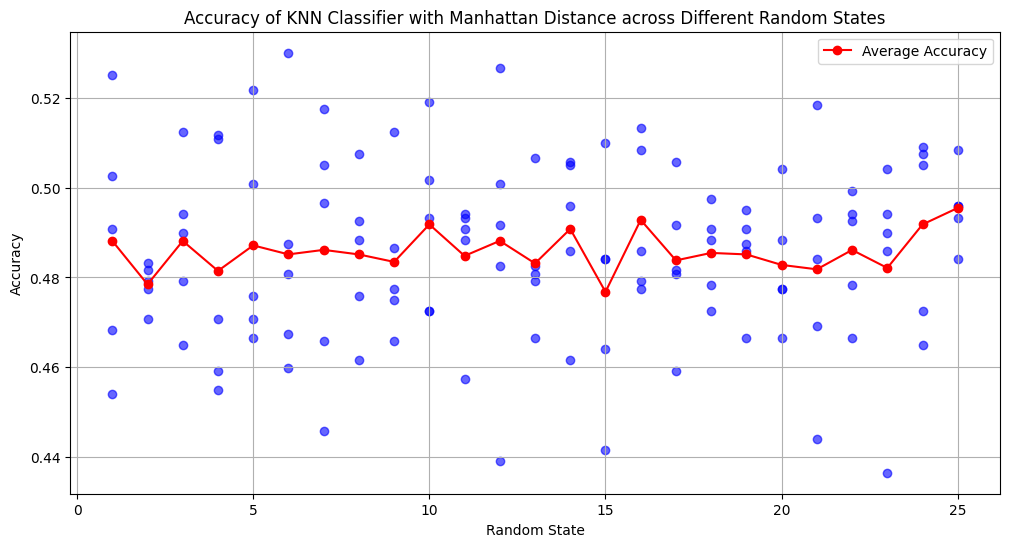

In [ ]:
# Extract the list of random states (keys from m_accuracy_dict)
random_states = list(m_accuracy_dict.keys())

# Calculate the average accuracy for each random state
average_accuracies = [np.mean(m_accuracy_dict[rs]) for rs in random_states]

# Create a new figure with a specific size
plt.figure(figsize=(12, 6))

# Plot individual accuracies as blue scatter points for each random state
for rs in random_states:
    accuracies = m_accuracy_dict[rs]
    plt.scatter([rs] * len(accuracies), accuracies, color='blue', alpha=0.6)

# Plot the average accuracy as a red line with circular markers
plt.plot(random_states, average_accuracies, color='red', marker='o', linestyle='-', label='Average Accuracy')


plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN Classifier with Manhattan Distance across Different Random States')
plt.legend()
plt.grid(True)
plt.show()